# Первый сборный проект

Нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цель проекта:** изучить данные о продаже игр, оценки пользователей и экспертов, жанры и платформы и выявить определяющие успешность игры закономерности.

**Задачи проекта:** 
1. Привести данные в подходящий для анализа вид (определить и заполнить пропущенные значения, изменить тип данных где это требуется)
2. Провести исследовательский анализ данных
3. Составить портрет пользователя по регионам
4. Проверить гипотезы
5. Подготовить общий вывод и рекомендации

## Открытие файла

In [1]:
#импорт библиотек
from scipy import stats as st
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
data = pd.read_csv('/datasets/games.csv') #открытие файла 

## Подготовка данных

In [3]:
data.info() #получение информации о переменных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
pd.set_option('display.max_columns', None)
data.head() #выведем первых 5 строк

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
# проверка на дубликаты
data.duplicated().sum()

0

### Замена названия столбцов (приведение к нижнему регистру)

In [6]:
data.columns = data.columns.str.lower() #приведем название столбцов к нижнему регистру
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Преобразование данных в нужные типы

Преобразуем переменную "год выпуска" к целочисленному значению

In [7]:
data['year_of_release'].isna().sum() #определим количество пропусков в переменной "год выпуска" 

269

In [8]:
269/16715 #определим долю пропущенных значений 

0.01609332934489979

In [9]:
data = data.dropna(subset=['year_of_release'])    # меньше 2%, удаляем строки 
data['year_of_release'] = data['year_of_release'].astype('int')    # меняем тип данных 
data['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Преобразуем переменную "оценка пользователя" к типу float, предварительно заменив знаение tbd (To Be Determined - с англ. Предстоит определить) на значение NaN </font><font color='Blue'><b>К пропускам могли привести ситуации, когда у игры не было оценок критиков и пользователей, а также рейтинга</b></font><br>

In [11]:
data.user_score.replace('tbd', np.nan, inplace=True)
data['user_score'] = data['user_score'].astype('float')
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [13]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Суммарные продажи во всех регионах

Добавим новый столбец с суммой продаж по всем регионам

In [14]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] 

In [15]:
data.head() # проверим

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [16]:
#удалим строки с пропусками в столбцах name и genre
data = data.dropna(subset=['name', 'genre']) 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [17]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

</font><font color='Blue'><b>Поставим заглушку в возрастном рейтинге</b></font><br>

In [18]:
data['rating'].value_counts() # посмотрим на возрастной рейтинг поближе

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [19]:
data['rating'] = data['rating'].fillna('RP') #поставил заглушку RP - "категория не присвоена"

In [20]:
data['rating'].value_counts() #проверим

RP      6677
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
Name: rating, dtype: int64

## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы

In [21]:
data['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Text(0.5, 0, 'Год выпуска')

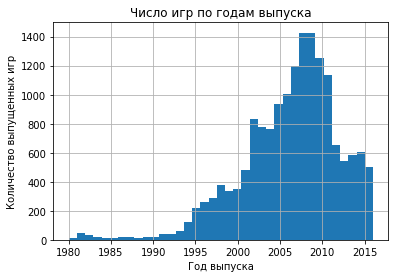

In [22]:
data['year_of_release'].plot(kind='hist', bins=37, grid=True)
plt.title('Число игр по годам выпуска')
plt.ylabel('Количество выпущенных игр')
plt.xlabel('Год выпуска')

Данные берут начало в 1980 году, значительный рост наблюдается с 2002 года, пик приходится на 2007-2011 гг. Далее отмечается спад. Для построения прогноза на 2017 год нет необходимости брать все данные, достаточно учесть последние 5 лет (период новой волны - спада, вызванного предположительно активным развитием мобильных приложений). 

### Продажи по платформам

In [23]:
#сгруппируем и отсортируем общие продажи по платформам
data.groupby('platform').sum()['total_sales'].reset_index().sort_values(by='total_sales', ascending=False).head(10)


,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


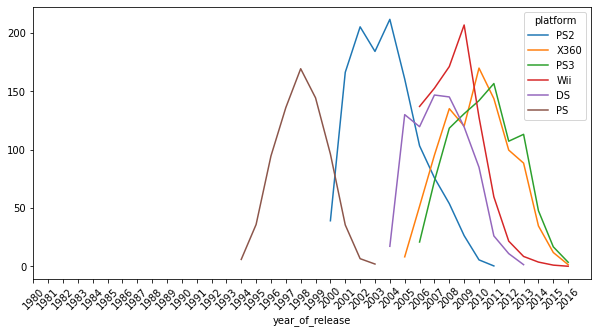

In [24]:
# построим линейный график
platform_top_sales = data.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')

platform_top_sales = platform_top_sales[['PS2', 'X360','PS3','Wii', 'DS', 'PS']]
platform_top_sales.plot(xticks=platform_top_sales.index,figsize=(10,5), rot=45);

Характерная длительность существования платформы 10-12 лет.   

In [25]:
# отберем данные за актуальный период, чтобы подробнее оценить прибыльность платформ за последние годы
data_sales = data.query('year_of_release >= 2012').pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')

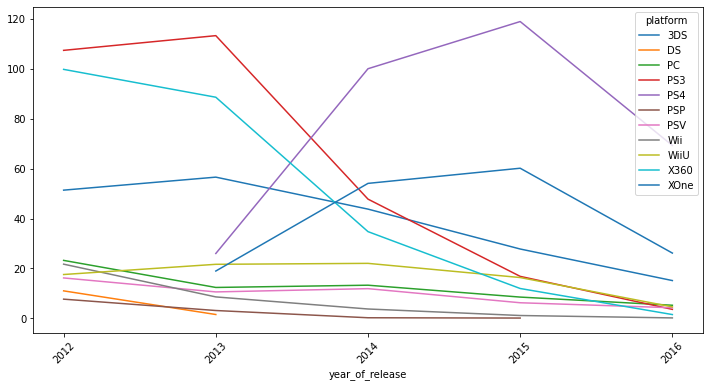

In [26]:
data_sales.plot(xticks=data_sales.index,figsize=(12,6), rot=45);

Наиболее прибыльными платформами в последние 5 лет являются Sony PlayStation 4 и Xbox One. Какое-то время будут актуальны игры для платформы 3DS, WiiU, Xbox 360 и PlayStation 3, но для них наблюдается спад и вряд ли произойдет повторный взлет. В 2016 года спад наблюдается по всем платформам, но можно предположить, что по этому году еще нет всех необходимых данных.

### Глобальная продажа игр

In [27]:
# отберем данные за последние 5 лет по топовым платформам
actual_period = data.query('year_of_release >= 2012') #отберем игры по актуальному периоду 
actual_period.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,RP,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [28]:
# посмотрим на продажи по топовым платформам за последние 5 лет
actual_period.groupby('platform')[['total_sales']].agg('sum').sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


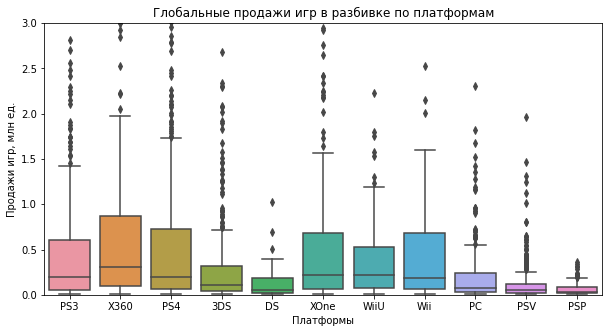

In [29]:
# посмотрим на график "ящик с усами"
plt.figure(figsize=(10,5))

plot = sns.boxplot(x='platform', y='total_sales', data=actual_period)
plot.set_ylim(0, 3)
plot.set_ylabel('Продажи игр, млн ед.')
plot.set_xlabel('Платформы')
plot.set_title('Глобальные продажи игр в разбивке по платформам')
plt.show()

У всех платформ наблюдается большое количество игр, которые имеют небольшие продажи, т.к. медианы смещены вниз. Но также мы наблюдаем, что у всех есть топовые игры, продажи которых привышают средние значения.

### Влияние на продажи отзывов пользователей и критиков

In [30]:
#определим средние оценки для платформ за последние 5 лет
actual_period.groupby('platform')[['user_score', 'critic_score']].agg('mean').round(1) 

,user_score,critic_score
platform,,
3DS,7.0,69.8
DS,7.0,80.0
PC,6.4,75.8
PS3,6.5,71.6
PS4,6.7,72.1
PSP,6.0,74.0
PSV,7.4,71.3
Wii,6.1,76.2
WiiU,6.9,70.7


In [31]:
# Корреляция между продажами и отзывами пользователей для платформы Xbox One
actual_period.query('platform == "XOne"')['total_sales'].corr(actual_period.query('platform == "XOne"')['user_score'])


-0.06892505328279412

In [32]:
# Корреляция между продажами и отзывами критиков для платформы Xbox One
actual_period.query('platform == "XOne"')['total_sales'].corr(actual_period.query('platform == "XOne"')['critic_score'])

0.41699832800840175

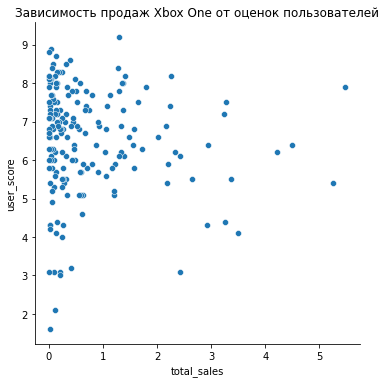

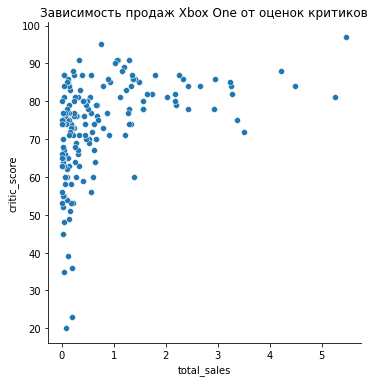

In [33]:
# визуализируем
sns.relplot(x='total_sales', y='user_score',data=actual_period.query('platform == "XOne"'))
plt.title('Зависимость продаж Xbox One от оценок пользователей')
sns.relplot(x='total_sales', y='critic_score',data=actual_period.query('platform == "XOne"'))
plt.title('Зависимость продаж Xbox One от оценок критиков')
plt.show()

Продажи на платформе Xbox One сильнее зависят от оценок критиков, чем пользователей.

In [34]:
# посмотрим на корреляцию оценок пользователей и продаж для остальных платформ
actual_period.query('platform != "XOne"')['total_sales'].corr(actual_period.query('platform != "XOne"')['user_score'])

0.010406363227598463

In [35]:
# посмотрим на корреляцию оценок критиков и продаж для остальных платформ
actual_period.query('platform != "XOne"')['total_sales'].corr(actual_period.query('platform != "XOne"')['critic_score'])

0.3004012384842725

Выводы для других платформ идентичны, единственное зависимость между продажами и оценками критиков для Xbox One чуть выше, чем для всех остальных платформ.

In [36]:
platforms = ['XOne', '3DS', 'PS3','WiiU', 'X360', 'PS4'] 

for platform in platforms:
    print(platform)
    print('Корреляция продаж и оценок пользователей:', actual_period.query('platform == @platform')['total_sales'].corr(actual_period.query('platform == @platform')['user_score']))
    print('Корреляция продаж и оценок критиков:',actual_period.query('platform == @platform')['total_sales'].corr(actual_period.query('platform == @platform')['critic_score']))
    

XOne
Корреляция продаж и оценок пользователей: -0.06892505328279412
Корреляция продаж и оценок критиков: 0.41699832800840175
3DS
Корреляция продаж и оценок пользователей: 0.19758263411038596
Корреляция продаж и оценок критиков: 0.32080286953607845
PS3
Корреляция продаж и оценок пользователей: -0.005143522887113828
Корреляция продаж и оценок критиков: 0.3314972592629587
WiiU
Корреляция продаж и оценок пользователей: 0.4002190202148617
Корреляция продаж и оценок критиков: 0.3483797601201749
X360
Корреляция продаж и оценок пользователей: 0.0061639786462133256
Корреляция продаж и оценок критиков: 0.36057348885073365
PS4
Корреляция продаж и оценок пользователей: -0.031957110204556376
Корреляция продаж и оценок критиков: 0.406567902061781


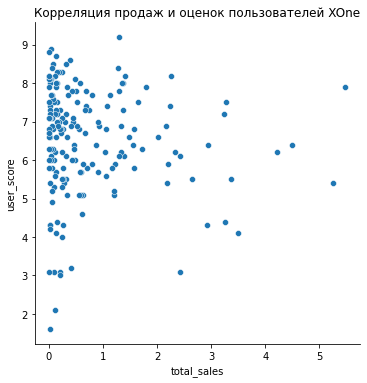

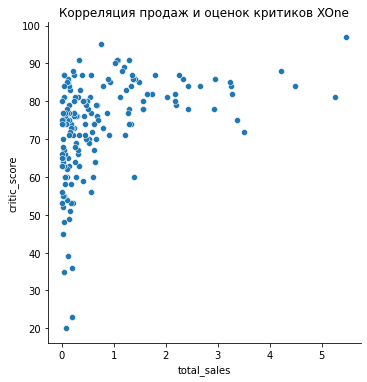

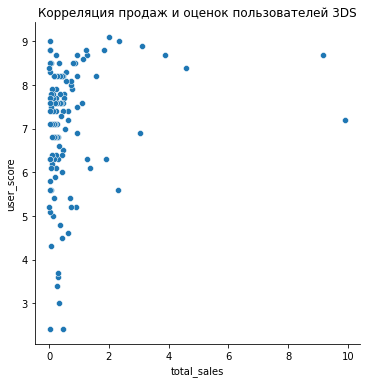

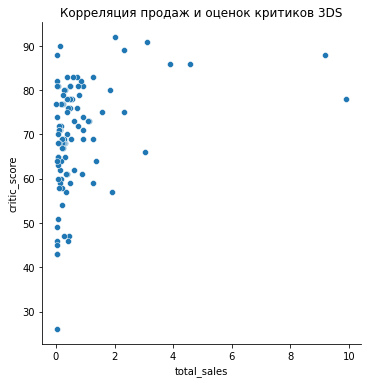

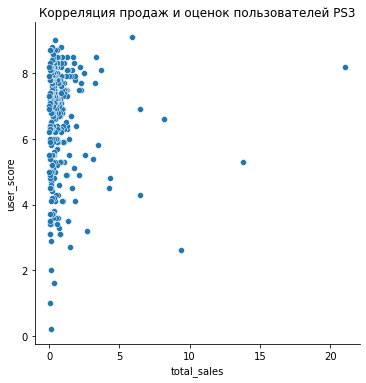

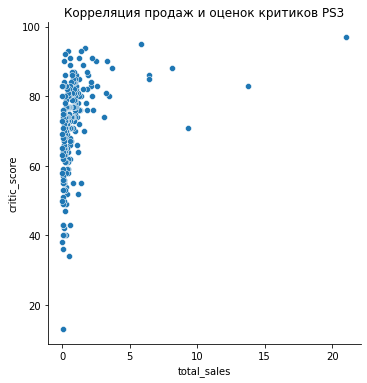

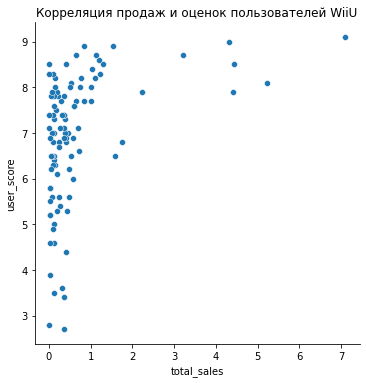

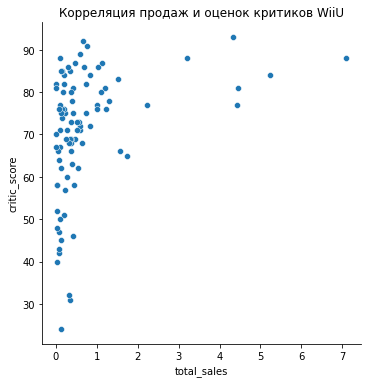

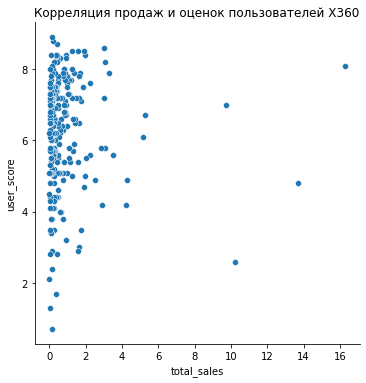

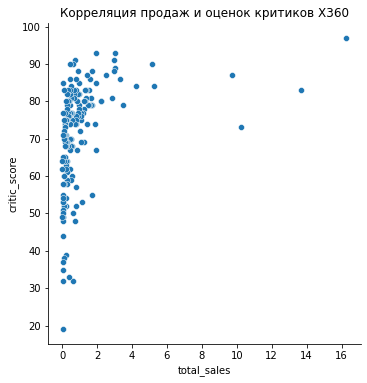

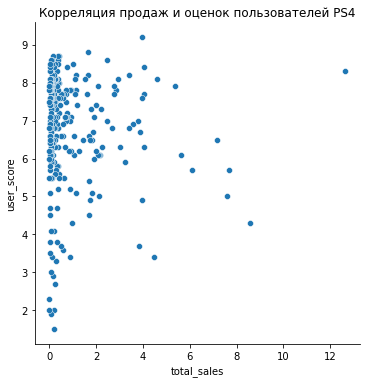

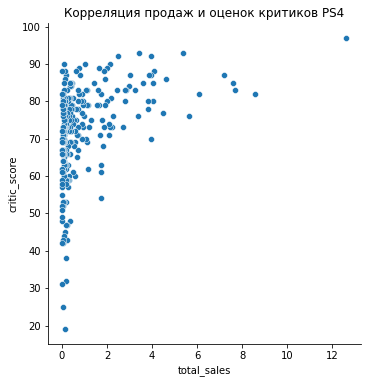

In [37]:
platforms = ['XOne', '3DS', 'PS3','WiiU', 'X360', 'PS4']

for platform in platforms:
    sns.relplot(x='total_sales', y='user_score',data=actual_period.query('platform == @platform'))
    plt.title(f'Корреляция продаж и оценок пользователей {platform}')
    sns.relplot(x='total_sales', y='critic_score',data=actual_period.query('platform == @platform'))
    plt.title(f'Корреляция продаж и оценок критиков {platform}')
    plt.show()
   

Из диаграмм рассеяния и расчета корреляции мы видим, что на платформе WiiU наблюдается самая большая связь между продажами и оценками пользователей. Что касается оценок критиков, то здесь связь наибольшая с продажами платформы Xbox One, как было отмечено выше.

### Распределение игр по жанрам

In [38]:
# Комментарий ревьюера
temp1, temp2 = actual_period.total_sales.sum(), data.query('year_of_release >= 2012').total_sales.sum()
temp1, temp2, round((temp2-temp1)/temp2*100, 2)

(1446.5300000000002, 1446.5300000000002, 0.0)

In [39]:
# проранжируем продажи по жанрам
actual_period.pivot_table(index = 'genre', values = 'total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


Наиболее продаваемыми жанрами в играх являются Action, Shooter и Sports. </font><font color='Blue'><b>Но посмотрим на данные подробнее построив диаграмму размаха.</b></font><br>

In [40]:
actual_period.pivot_table(index = 'genre', values = 'total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Shooter,0.440
Sports,0.240
Platform,0.210
Role-Playing,0.140
Racing,0.140
Fighting,0.130
Action,0.120
Misc,0.120
Simulation,0.120


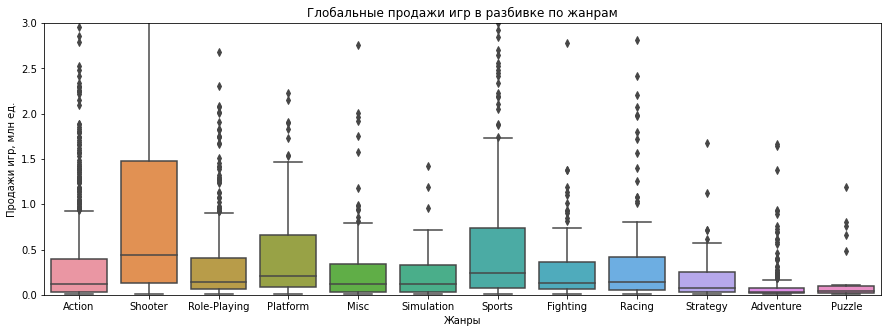

In [41]:
# посмотрим на диаграмму размаха
plt.figure(figsize=(15,5))

plot = sns.boxplot(x='genre', y='total_sales', data=actual_period)
plot.set_ylim(0, 3)
plot.set_ylabel('Продажи игр, млн ед.')
plot.set_xlabel('Жанры')
plot.set_title('Глобальные продажи игр в разбивке по жанрам')
plt.show()

Но когда мы смотрим на медианные значения, то видим, что жанр Shooter не имеет большого количества выбросов, что приводит к максимальным сумам продаж, но при этом самый успешный с точки зрения медианны продаж.

##  Портрет пользователя каждого региона

### Самые популярные платформы по регионам

In [42]:
# определим наиболее популярные платформы в каждом регионе
actual_period.pivot_table(index = 'platform', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum').apply(lambda col: col / col.sum(), axis=0).style.format("{:.0%}")

,eu_sales,jp_sales,na_sales
platform,,,
3DS,8%,46%,9%
DS,1%,2%,1%
PC,7%,0%,3%
PS3,21%,18%,17%
PS4,28%,8%,18%
PSP,0%,5%,0%
PSV,2%,11%,2%
Wii,2%,2%,3%
WiiU,5%,7%,6%


В Европе отдают предпочтение Sony PlayStation (56% пользователей), в Северной Америке XBox - 43% пользователей и в Японии 3DS  (57%).

### Самые популярные жанры по регионам

In [43]:
# определим наиболее популярные жанры в каждом регионе
popular_genres = actual_period.pivot_table(index = 'genre', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum').apply(lambda col: col / col.sum(), axis=0).style.format("{:.0%}")
popular_genres

,eu_sales,jp_sales,na_sales
genre,,,
Action,31%,27%,30%
Adventure,2%,4%,2%
Fighting,2%,5%,3%
Misc,5%,7%,6%
Platform,4%,4%,4%
Puzzle,0%,1%,0%
Racing,5%,1%,3%
Role-Playing,10%,34%,11%
Shooter,22%,5%,24%


Text(0.5, 1.0, 'EU')

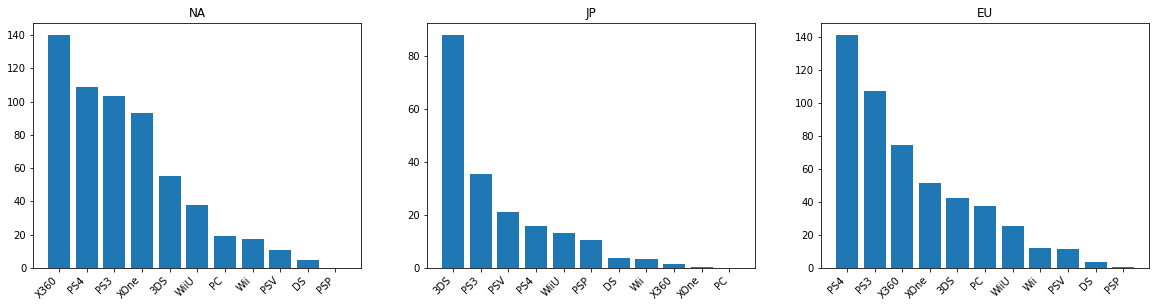

In [44]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5));
fig.autofmt_xdate(rotation=45)

platforms_na_sales =  pd.pivot_table(actual_period, index='platform', values='na_sales',aggfunc='sum').sort_values('na_sales', ascending=False).reset_index()
 
platforms_jp_sales =  pd.pivot_table(actual_period, index='platform', values='jp_sales',aggfunc='sum').sort_values('jp_sales', ascending=False).reset_index()
 
platforms_eu_sales =  pd.pivot_table(actual_period, index='platform', values='eu_sales',aggfunc='sum').sort_values('eu_sales', ascending = False).reset_index()
 
 
axs[0].bar(platforms_na_sales['platform'], platforms_na_sales['na_sales'])
axs[0].set_title('NA')

axs[1].bar(platforms_jp_sales['platform'], platforms_jp_sales['jp_sales'])
axs[1].set_title('JP')

axs[2].bar(platforms_eu_sales['platform'], platforms_eu_sales['eu_sales'])
axs[2].set_title('EU')

Text(0.5, 1.0, 'EU')

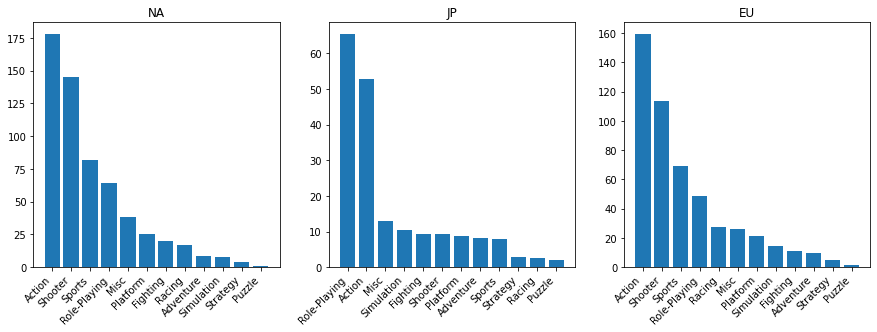

In [45]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.autofmt_xdate(rotation=45)
 
genres_na_sales =  pd.pivot_table(actual_period, index='genre', values='na_sales',aggfunc='sum').sort_values('na_sales', ascending=False).reset_index()
 
genres_jp_sales =  pd.pivot_table(actual_period, index='genre', values='jp_sales',aggfunc='sum').sort_values('jp_sales', ascending=False).reset_index()
 
genres_eu_sales =  pd.pivot_table(actual_period, index='genre', values='eu_sales',aggfunc='sum').sort_values('eu_sales', ascending = False).reset_index()
 
 
axs[0].bar(genres_na_sales['genre'], genres_na_sales['na_sales'])
axs[0].set_title('NA')

axs[1].bar(genres_jp_sales['genre'], genres_jp_sales['jp_sales'])
axs[1].set_title('JP')

axs[2].bar(genres_eu_sales['genre'], genres_eu_sales['eu_sales'])
axs[2].set_title('EU')

Любимые жанры в Европе и Северной Америке практически совпадают - это "Action", "Shooters", "Sports" и "Role_playing" на первых 4 позициях, а на 5 строчкев Европе "Racing", а в Северной Америке - "Misc". В Японии картина абсолютно другая: "Role-Playing", "Action", "Simulation", "Shooters" и "Misc".

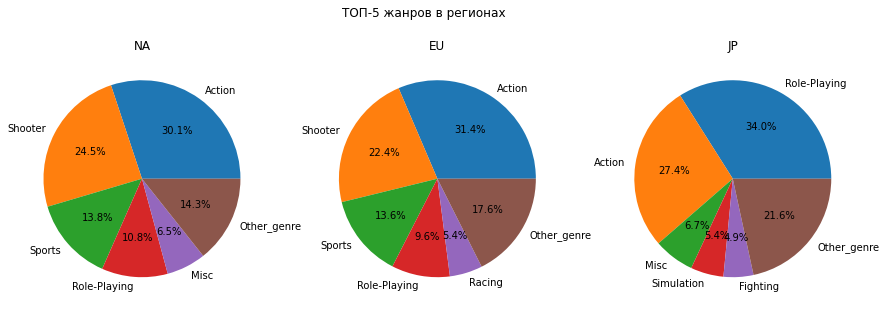

In [54]:
# Комментарий ревьюера 2
games_fresh = actual_period.copy()
countries = games_fresh.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(3):
  # выберем 5 самых продающих жанров
  df_i = (games_fresh.groupby('genre')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в другие жанры
  df_i = df_i.append({'genre': 'Other_genre', countries[i]: games_fresh[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['genre'], autopct='%1.1f%%')
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

### Влияние рейтинга ESRB по регионам

In [46]:
# посмотрим на доли возрастных рейтингов по регионам
actual_period.pivot_table(index = 'rating', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum').apply(lambda col: col / col.sum(), axis=0).style.format("{:.0%}")

,eu_sales,jp_sales,na_sales
rating,,,
E,22%,15%,19%
E10+,11%,4%,13%
M,38%,11%,39%
RP,18%,57%,17%
T,10%,14%,11%


В Европе и Америке больше продаются игры с рейтингом М - зрелые, а в Японии - без рейтинга. 

In [47]:
# Комментарий ревьюера
temp = data.query('year_of_release >= 2012').copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


RP      1275
M        498
T        412
E        395
E10+     306
Name: rating, dtype: int64

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [48]:
# введем переменные платформ и удалим пропуски
xone = actual_period.query('platform == "XOne"').user_score.dropna().reset_index(drop=True)
pc = actual_period.query('platform == "PC"').user_score.dropna().reset_index(drop=True)

In [49]:
alpha = .05 

results = st.ttest_ind(xone, pc, equal_var=False)
print('p-значение: ', results.pvalue)    
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


In [50]:
# взглянем на средние оценки пользователей
display(actual_period.query('platform in ["XOne", "PC"]').pivot_table(index='platform', values='user_score'))

,user_score
platform,
PC,6.428641
XOne,6.521429


Вывод: средние пользовательские рейтинги Xbox One и PC одинаковые

### Средние пользовательские рейтинги жанров Action и Sports разные.

H0: Cредние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковые  
H1: Cредние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные

In [51]:
# введем переменные жанров и удалим пропуски
action = actual_period.query('genre == "Action"').user_score.dropna().reset_index(drop=True)
sports = actual_period.query('genre == "Sports"').user_score.dropna().reset_index(drop=True)

In [52]:
alpha = .05

results = st.ttest_ind(action, sports, equal_var=False)

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  4.24307776572644e-20
Отвергаем нулевую гипотезу


In [53]:
# взглянем на средние оценки пользователей
display(actual_period.query('genre in ["Action", "Sports"]').pivot_table(index='genre', values='user_score'))

,user_score
genre,
Action,6.825048
Sports,5.455897


Вывод: Cредние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные

## Выводы и рекомендации

**Выводы:**
 - Индстрия компьютерных игр появляется в конце 70-х - начале 80-х, значительный рывок наблюдается с 1994 года, а пик приходится на 2007-2011 гг. Начиная с 2012 года наблюдается резкое падение продаж компьютерных игр, что возможно связано с развитием индустрии мобильных приложений.
 - Лидером по количеству проданных игр является PS2 (продано более 1 млрд игр). Лидером временного интервала 2012-2016 является PS4 (общие продажи составляют 314 млн копий).
 - Оценки пользователей не коррелируют с продажами, а вот критики видимо несильно, но влияют на продажи, по крайней мере наблюдается небольшая корреляция.
 - Самыми популярными жанрами являются: Action, Shooter, Sports, Role-Playing (особенно в Японии), Misc	
 - Предпочтения пользователей в Японии отличаются по платформам, жанрам и рейтингу игр, в то время как жители Европы и Северной Америки имеют похожие вкусы. Это стоит учитывать при разроботке игр, если производитель хочет выйти на японский рынок.


**Рекомендации:**
 - Рекомендуется делать ставку на платформы PlayStation 4 или Xbox One для игр рынка Европы и Северной Америкиа для рынка Японии на Nintendo 3DS.
 - Рекомендованные жанры для Европы и Северной Америки - Action, Shooter и Sports для Японии - Role-Playing и Action.
 - Рекомендованный рейтинги для Америки и Европы М - "зрелые".